# HOL2148 - Working with Objectstores

## 0. Introduction

In this notebook we connect to an objectstore. For the purpose of this lab a Minio Server is running on a vm. We use a preconfigured platform connection and add it to the current project.

## 1. Prerequistes
This exersice requires some familiarity with Python and Jupyter notebooks. Only very basic knowledge is required - not more that to be able to edit and run a cell. See the description below and in the case of question please refere to the Lab instructor.
Python code is given - basic understanding from other programming languages will be sufficient to understand the code and modify it to lets say experiment what will happen e.g. when I look at the contents of other objetcs as those from the examples.

To run the cells a connection to this Objectstore must be added to the project

### Add the connection to the Objectstore to your project

At platformlevel a global connection to this labs Objectstore is already defined. To uses this in your Project it has to be added.     
If not already done, here is how:

1. Go Back to the Project Landing Page
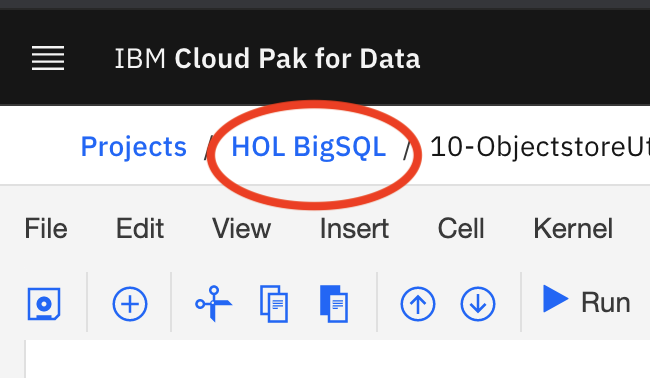
2. Choose "Add to project"
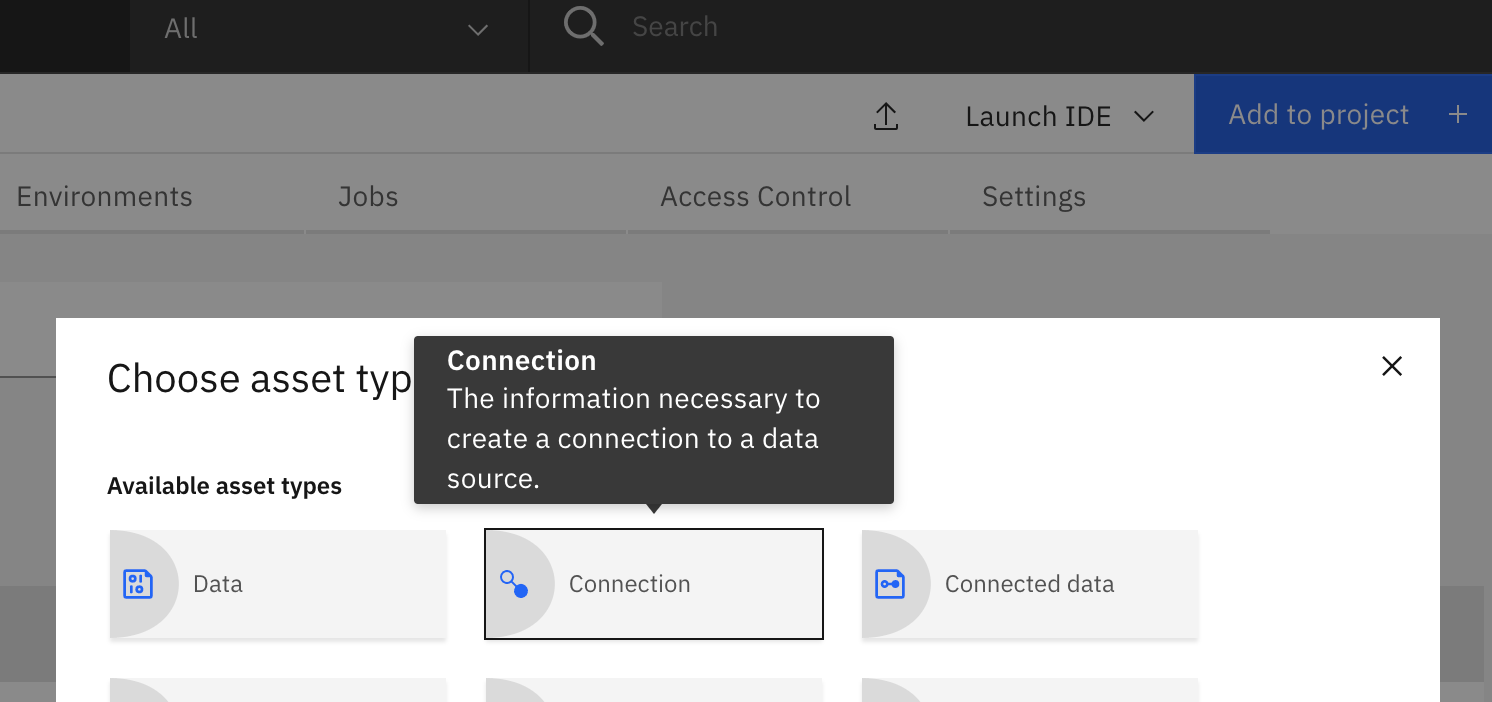
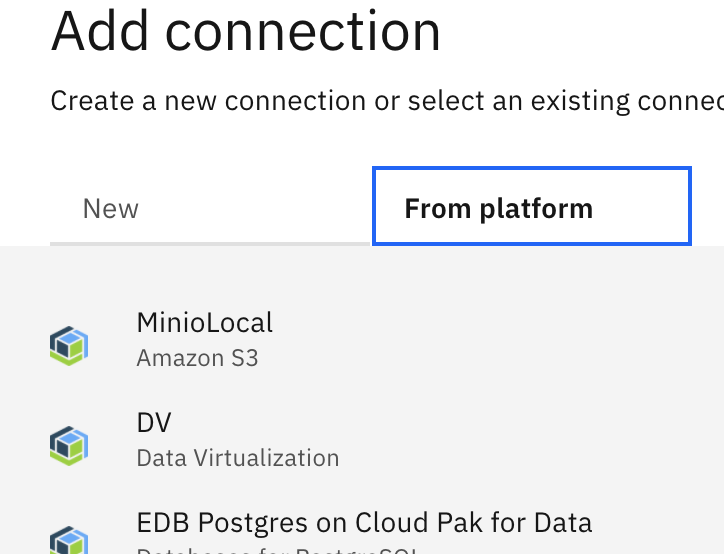
3. Add Connection
    - Choose "From platform"
    - and then "MinioLocal"
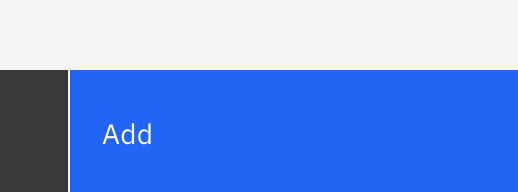
No further changes needed, just choose "Add"
4. Open this Notebook again

## 2. Run the cells below
1. Make this notebook editable   
    - Cick the Edit button on the top
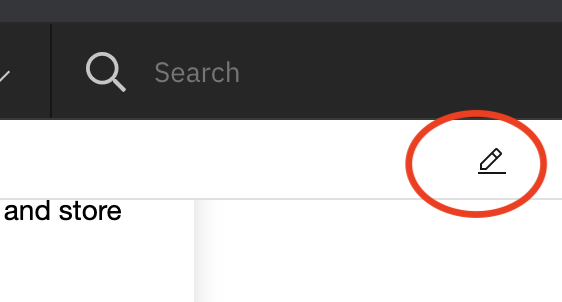
This will start the connected environment - a container that hosts the Python runtime which this notbook will use.   
Be patient this will take some seconds.   
Then run your first cell
     - Click at any place into the first cell below and rund it by by pushing \<SHIFT> and \<RETURN>. 

### Carry on with the remaining cells
2. Connect to MinioCluster
3. List the objects 
        - Buckets
        - Objects (Files)
        - Print Contents of a sample File

In [ ]:
# The following code uses a connection trhat was previously added to the project
# No output is expected - this shpuld run without error

import boto3
from project_lib import Project
project = Project.access()
MinioLocalCluster_credentials = project.get_connection(name="MinioLocal")


In [ ]:
# The credentials are returned as a python dictionary
# Lets have a look and print the crendentials
MinioLocalCluster_credentials
# The output below should start with "{'secret_key':"
# please notify that the cedentials are contained you are able to see the password in clear text - so at any time e.g. when you chek in a notebook to Git make sure it contains no credentials

In [ ]:
# We use the boto3 - a S3 Python library to work with the files on our S3 server
# Please note there ar Minio-Specific libraries out that may be optimized for Minio for this Lab we target for platform indepedency - this code should run with your S3 provider of choice.
client = boto3.client(
    's3',
    endpoint_url=MinioLocalCluster_credentials['url'],
    aws_access_key_id=MinioLocalCluster_credentials['access_key'],
    aws_secret_access_key=MinioLocalCluster_credentials['secret_key']
)

In [ ]:
# Lets play with the connection - first lets have a look at buckets
# -> which buckts are available?
buckets = client.list_buckets()

for bucket in buckets["Buckets"]:
    print(bucket["Name"])

# Note you see all buckets availlable - user00 is a shared bucket which is used read only by all students
# Each student (or group) has one specific user and a corresponding buckte. This bucket should be the only foleder that is written to.  


In [ ]:
# Now navigate in the Structure
# list objects in yout bucket 01

# Tasks - first list the contents of the shared foldet
# You can than change "user00" with your specific bucket and then run the cell again
docBucket = client.list_objects(Bucket="user00")

print("\nList of Objects:")
for key in docBucket['Contents']:
    print("{name}\t{size}\t{modified}".format(
                name = key['Key'],
                size = key["Size"],
                modified = key["LastModified"]))

In [ ]:
# Now lets see inside a some file from text

response = client.get_object(
    Bucket="user00", 
    Key="orders/orders.tbl",
)
#    print(response.getheaders())
#    Read data from response.
#    print first n byte

# read 
bytesToRead = 128
print(response['Body'].read(bytesToRead).decode('utf-8'))